In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
plt.style.use('seaborn-white')

### 1.loading the dataset

In [2]:
multiclass = pd.read_csv(r'C:\Users\Fra\Documents\SDS\SML\DATASET PROGETTO\multiclass_dataset.csv',header= 0)

In [227]:
multiclass

,Unnamed: 0,DepMap_ID,A1BG..1.,A1CF..29974.,A2M..2.,A2ML1..144568.,A3GALT2..127550.,A4GALT..53947.,A4GNT..51146.,AAAS..8086.,...,ZWINT..11130.,ZXDA..7789.,ZXDB..158586.,ZXDC..79364.,ZYG11A..440590.,ZYG11B..79699.,ZYX..7791.,ZZEF1..23140.,ZZZ3..26009.,label
0,1,ACH-000001,0.099666,0.013250,0.024042,0.028172,0.068277,0.027552,0.022760,0.290026,...,0.064110,0.032793,0.007031,0.004174,0.073699,0.009299,0.004183,0.011972,0.314198,2
1,2,ACH-000004,0.021446,0.048168,0.092776,0.037723,0.019877,0.111344,0.006439,0.187637,...,0.245381,0.010167,0.022313,0.018303,0.016327,0.142028,0.008184,0.009684,0.043842,7
2,3,ACH-000005,0.074653,0.024448,0.019094,0.007517,0.038370,0.120430,0.008827,0.206887,...,0.195097,0.049115,0.034303,0.041229,0.091393,0.088391,0.020917,0.035469,0.073934,7
3,4,ACH-000007,0.032767,0.063457,0.011623,0.010435,0.032960,0.039549,0.032096,0.184442,...,0.636628,0.013525,0.003056,0.006914,0.036079,0.147926,0.095257,0.156620,0.304962,1
4,5,ACH-000009,0.042667,0.050918,0.015425,0.013461,0.025152,0.074668,0.037041,0.174388,...,0.417735,0.029430,0.003645,0.053849,0.118411,0.410616,0.034562,0.068021,0.237540,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,1018,ACH-002467,0.071867,0.006426,0.005734,0.017032,0.031251,0.095952,0.025609,0.067803,...,0.906865,0.006804,0.009335,0.030144,0.016897,0.030167,0.081968,0.094031,0.838586,0
1018,1019,ACH-002508,0.074253,0.045109,0.007523,0.015757,0.174828,0.076533,0.048190,0.519489,...,0.026647,0.051188,0.003223,0.172967,0.033204,0.060954,0.094065,0.226655,0.009252,3
1019,1020,ACH-002510,0.037779,0.037742,0.026398,0.023308,0.069444,0.021694,0.076317,0.070130,...,0.486191,0.038700,0.061647,0.032087,0.089870,0.041163,0.043377,0.116560,0.181728,3
1020,1021,ACH-002512,0.064018,0.072608,0.012102,0.019472,0.098481,0.071118,0.181386,0.673847,...,0.099189,0.022377,0.029959,0.338388,0.031838,0.114976,0.024754,0.095422,0.721828,3


In [243]:
first_split, second_split = train_test_split (multiclass, test_size=408,
                                              train_size=614, random_state=42,
                                              shuffle=True, stratify=None,
)

In [244]:
Training, Test = train_test_split(first_split, train_size = 488,
                                   test_size = 126, random_state=42,
                                   shuffle=True, stratify=None,
)

In [245]:
y_test = Test.iloc[:,17395]
x_train = np.array(Training.drop(['label','Unnamed: 0','DepMap_ID'], axis = 1))
y_train = Training.iloc[:,17395]
x_test = np.array(Test.drop(['label','DepMap_ID','Unnamed: 0'], axis = 1))

In [246]:
y_train

998    4
134    8
112    1
74     9
945    6
      ..
393    9
167    5
716    2
553    9
11     5
Name: label, Length: 488, dtype: int64

### 2.Random Forest with the same parameters as in the RF.blood model

In [247]:
rf = RandomForestClassifier(random_state = 2311, n_jobs = -1,
                    min_samples_leaf = 4, n_estimators = 504,
                    min_samples_split= 10, max_leaf_nodes= 35,
                    max_depth = 48, class_weight = "balanced",
                    bootstrap = True, oob_score = True)

In [248]:
rf.fit(x_train, y_train)
print('Training score: ', rf.score(x_train, y_train))
print('Test score: ', rf.score(x_test, y_test))

Training score:  1.0
Test score:  0.5079365079365079


In [249]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)
print(f'The accuracy of the model is {round(accuracy_score(y_test, y_pred), 3)*100} %')

The accuracy of the model is 50.8 %


In [250]:
#Create the vectors that contains the Cancers chosen (Cancer_Type2) and the one observed (Cancer_Type)
Cancer_Type = [ "Eye", "Gastrointestinal","Genitals","Muscle-Bone","Neuro","Breast","Head_Neck","Blood",
               "Genitourinary", "Lung"] 

In [251]:
#Change the name of the coloumns of the class matrix created through get_dummies using more meaningful names
y_test_dummies = pd.get_dummies(y_test).set_axis(Cancer_Type, axis = 1)
y_pred_dummies = pd.get_dummies(y_pred, dummy_na= True).T.reindex(range(10)).T.fillna(0)
y_pred_dummies = y_pred_dummies.set_axis(Cancer_Type, axis= 1)

In [252]:
 multilabel_confusion_matrix(y_test_dummies, y_pred_dummies)

array([[[121,   0],
        [  5,   0]],

       [[ 78,  26],
        [  7,  15]],

       [[113,   3],
        [  5,   5]],

       [[106,   6],
        [  7,   7]],

       [[ 87,  20],
        [  6,  13]],

       [[119,   1],
        [  5,   1]],

       [[117,   2],
        [  1,   6]],

       [[108,   1],
        [  0,  17]],

       [[118,   1],
        [  7,   0]],

       [[105,   2],
        [ 19,   0]]], dtype=int64)

In [253]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                fontsize = 15,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

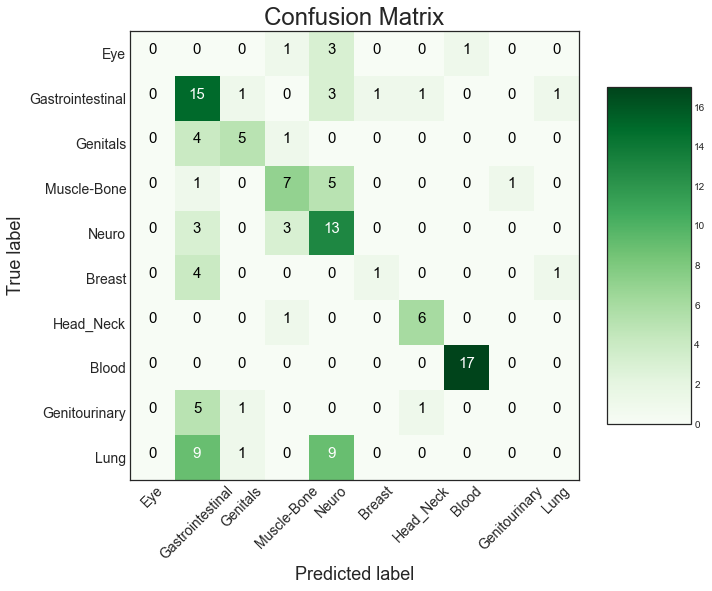

In [254]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')

In [15]:
out = cross_validate(rf, x_train, y_train, cv = 5, n_jobs = -1,
                scoring = 'accuracy', return_estimator = True)

In [146]:
x_train_feature_impo = Training.drop(['label','Unnamed: 0','DepMap_ID'], axis = 1)

feat_impo_all = []
for i, estimator in enumerate(out['estimator']):
    print("First 10 features sorted by their importance for model n. {}:".format(i+1))
    feat_impo = pd.DataFrame(estimator.feature_importances_,
                            index = x_train_feature_impo.columns,
                            columns = ['Importance{}'.format(i+1)]).sort_values('Importance{}'.format(i+1), ascending = False)
    print(feat_impo[:10])
    print('--------------------------------')

    feat_impo_all.append(feat_impo[feat_impo['Importance{}'.format(i+1)] > 0.001])
    
    
    
#altro metodo per feat_impo
# pd.DataFrame(out['estimator'][1].feature_importances_,
#                             index = x_train_feature_impo.columns,
#                             columns = ['Importance'.format(i+1)]).where(lambda x : x > 0.0005).dropna().index

First 10 features sorted by their importance for model n. 1:
                Importance1
SPDEF..25803.      0.002908
PAX8..7849.        0.002902
ILK..3611.         0.002712
MBNL1..4154.       0.002516
IKZF1..10320.      0.002475
KLF5..688.         0.002397
FERMT2..10979.     0.002145
ATP1B3..483.       0.001954
SOX10..6663.       0.001832
TP63..8626.        0.001778
--------------------------------
First 10 features sorted by their importance for model n. 2:
                  Importance2
IKZF1..10320.        0.003495
PAX8..7849.          0.002696
MBNL1..4154.         0.002298
FERMT2..10979.       0.002114
ILK..3611.           0.001933
ARHGAP45..23526.     0.001896
AK2..204.            0.001776
MYB..4602.           0.001752
ZEB2..9839.          0.001719
MEF2C..4208.         0.001707
--------------------------------
First 10 features sorted by their importance for model n. 3:
                Importance3
PAX8..7849.        0.002972
IKZF1..10320.      0.002862
FERMT2..10979.     0.002616
M

In [ ]:
feat_impo_all[1].plot.bar(figsize = (25, 10), color = 'c')
plt.title('Random Forest Feature Importance (Model n. 2)')
plt.xlabel('Features')
plt.show()

In [257]:
y_train_dummies = pd.get_dummies(y_train).set_axis(Cancer_Type, axis = 1)
y_train_dummies.sum()
y_test_dummies.sum()

Eye                  5
Gastrointestinal    22
Genitals            10
Muscle-Bone         14
Neuro               19
Breast               6
Head_Neck            7
Blood               17
Genitourinary        7
Lung                19
dtype: int64

In [19]:
#n_obs = y_train_dummies.sum()
#class_perc = n_obs/sum(n_obs)

In [273]:
rf_class_weighted = RandomForestClassifier(random_state = 2311, n_jobs = -1,
                    min_samples_leaf = 4, n_estimators = 504,
                    min_samples_split= 10, max_leaf_nodes= 35,
                    max_depth = 48, class_weight={0:2,1:1,2:2,3:2,4:1.6,5:2,6:3,7:2,8:3,9:4},
                    bootstrap = True, oob_score = True)


In [274]:
rf_class_weighted.fit(x_train, y_train)
print('Training score: ', rf_class_weighted.score(x_train, y_train))
print('Test score: ', rf_class_weighted.score(x_test, y_test))

Training score:  0.9959016393442623
Test score:  0.5952380952380952


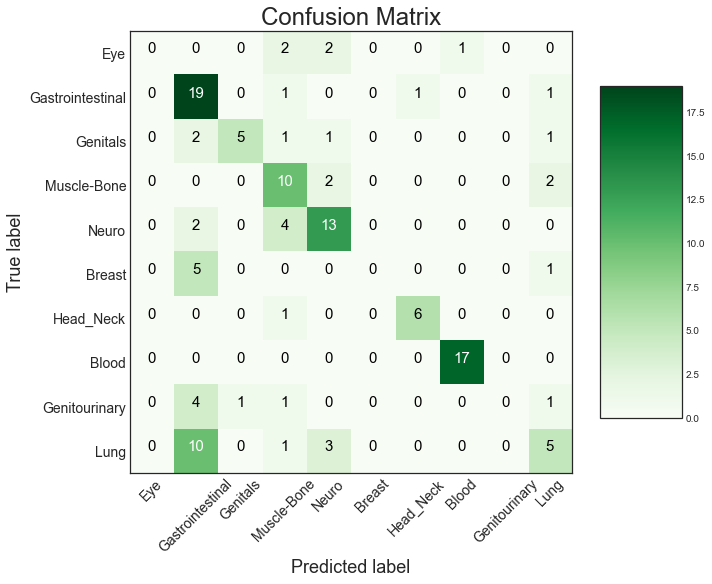

In [275]:
y_pred = rf_class_weighted.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')

### New model using the remaining features

In [162]:
important_features = feat_impo.loc[feat_impo['Importance5'] > 0.0005]
genes = important_features.drop(['Importance5'], axis = 1).index
genes

Index(['MEF2C..4208.', 'MYB..4602.', 'FERMT2..10979.', 'CBFB..865.',
       'ILK..3611.', 'POU2AF1..5450.', 'MBNL1..4154.', 'CDS2..8760.',
       'ZEB2..9839.', 'SPDEF..25803.',
       ...
       'RBPJ..3516.', 'BET1..10282.', 'FPGS..2356.', 'NOL9..79707.',
       'LSM3..27258.', 'MITF..4286.', 'EFHD2..79180.', 'ITGA3..3675.',
       'ATRX..546.', 'HNRNPF..3185.'],
      dtype='object', length=128)

In [234]:
Training2, Test2 = train_test_split(second_split, train_size = 323,
                                   test_size = 82, random_state=42,
                                   shuffle=True, stratify=None,
)

In [235]:
y_test = Test2.iloc[:,17395]
x_train = np.array(Training2.filter(genes, axis = 1))
y_train = Training2.iloc[:,17395]
x_test = np.array(Test2.filter(genes,axis = 1))

NameError: name 'genes' is not defined

In [204]:
rf = RandomForestClassifier(random_state = 42, n_jobs = -1,
                    min_samples_leaf = 4, n_estimators = 504, class_weight = "balanced",
                    bootstrap = True, oob_score = True)

In [205]:
rf.fit(x_train, y_train)
print('Training score: ', rf.score(x_train, y_train))
print('Test score: ', rf.score(x_test, y_test))

Training score:  0.996875
Test score:  0.5662650602409639


In [208]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)
print(f'The accuracy of the model is {round(accuracy_score(y_test, y_pred), 3)*100} %')

The accuracy of the model is 56.599999999999994 %


In [209]:
#Change the name of the coloumns of the class matrix created through get_dummies using more meaningful names
y_test_dummies = pd.get_dummies(y_test).set_axis(Cancer_Type, axis = 1)
y_pred_dummies = pd.get_dummies(y_pred, dummy_na= True).T.reindex(range(10)).T.fillna(0)
y_pred_dummies = y_pred_dummies.set_axis(Cancer_Type, axis= 1)

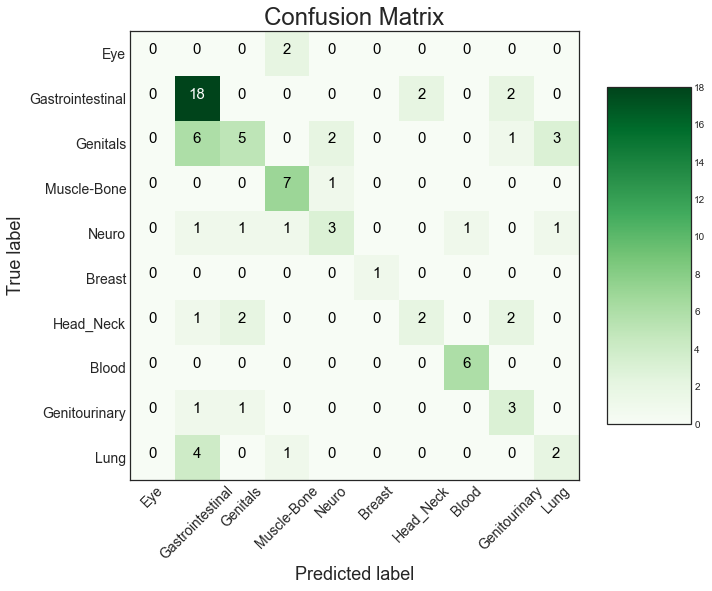

In [210]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')